<a href="https://colab.research.google.com/github/NafarexaF1F022030/NafaRexa/blob/main/LAPORAN_2%263_MLMP_nafaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum II Machine Learning**

=================================================

Nama  : Nafa Rexa
NPM : F1F022030

=================================================

# Latar Belakang

#
Klasifikasi adalah salah satu teknik machine learning yang berfungsi untuk mengelompokkan data ke dalam kelas/kategori tertentu berdasarkan pola dari data pelatihan. Di banyak penelitian Indonesia, klasifikasi digunakan untuk memecahkan masalah-masalah nyata seperti prediksi kesehatan, potensi akademik, dan klasifikasi sosial. Karena kemampuannya dalam mengolah data kategorikal dan numerik, klasifikasi menjadi sangat relevan di riset lokal untuk membantu pengambilan keputusan berbasis data (Putra & Widiyanto, 2021; Marutho, 2024).

Dalam konteks klasifikasi, Decision Tree (pohon keputusan) adalah metode populer di Indonesia karena interpretabilitasnya yang tinggi — aturan klasifikasi yang terbentuk pemisahan pohon mudah dipahami oleh peneliti maupun pemangku kebijakan. Pada studi komparasi status kesehatan, Decision Tree menunjukkan performa akurasi lebih tinggi dibanding KNN dan Naive Bayes, yang menjadikannya pilihan menarik untuk kasus klasifikasi data kesehatan (Biyantoro & Prasetyo, 2022). Selain itu, Decision Tree sering dibandingkan dengan KNN dalam berbagai domain studi lokal karena kemampuannya mengekstrak struktur aturan dari data (Putra & Widiyanto, 2021).

Sementara itu, K‑Nearest Neighbors (KNN) merupakan algoritma klasifikasi berbasis instance yang mengklasifikasikan sampel baru berdasarkan 'jarak' ke tetangga terdekat dalam data latih. KNN banyak digunakan di penelitian Indonesia karena fleksibilitas dalam menangani data yang kompleks dan non-linear. Sebagai contoh, penerapan KNN pada klasifikasi akademik siswa di SMP wilayah Mejobo menunjukkan kinerja yang bersaing dengan Decision Tree dalam mengidentifikasi potensi akademik siswa (Febrian, Triyanto, & Fithri, 2023). Selain itu, dalam analisis klasifikasi penyakit jantung dengan ekstraksi fitur PCA, penelitian lokal menggunakan KNN bersama Decision Tree untuk memperoleh prediksi dengan metrik akurasi dan F1 score yang signifikan (Nasien dkk., 2022).

Karena kedua metode ini — Decision Tree dan KNN — memiliki karakteristik yang berbeda namun saling melengkapi, banyak penelitian di Indonesia melakukan komparasi antara keduanya. Decision Tree unggul dalam interpretabilitas dan pembuatan aturan, sedangkan KNN memberikan prediksi berbasis kedekatan lokal. Kombinasi perbandingan ini membantu peneliti lokal memilih algoritma yang paling cocok sesuai dengan karakteristik dataset dan kebutuhan klasifikasi spesifik (Sotarjua & Santoso, 2024; Putra & Widiyanto, 2021).

# Rumusan Masalah

Rumusan masalah pada pertemuan ini adalah:

1. Apa itu konsep dasar algoritma Decision Tree?
2. Bagaimana membedakan antara Classification Tree dan Regression Tree?
3. Bagaimana menerapkan Decision Tree untuk klasifikasi?
4. Bagaimana melakukan evaluasi model Decision Tree menggunakan confusion matrix dan accuracy score?
5. Bagaimana menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan?
6. Bagaimana melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain?
7. Apa konsep dasar algoritma K-Nearest Neighbors (KNN) untuk klasifikasi?
8. Bagaimana cara mengimplementasikan KNN menggunakan pustaka Scikit-learn di Phyton?
9. Bagaimana performa model KNN menggunakan accuracy score dan confusion matrix?

# Tujuan Penelitian

Tujuan pada pertemuan ini adalah sebagai berikut:

1. Untuk menjelaskan konsep dasar algoritma Decision Tree.
2. Untuk membedakan antara Classification Tree dan Regression Tree.
3. Untuk menerapkan algoritma Decision Tree dalam klasifikasi data.
4. Untuk mengevaluasi model Decision Tree menggunakan confusion matrix dan accuracy score.
5. Untuk menginterpretasikan hasil model melalui visualisasi pohon keputusan.
6. Untuk melatih kemampuan analisis melalui penerapan Decision Tree pada dataset lain.
7. Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk klasifikasi.
8. Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Phyton.
9. Mengevaluasi performa model KNN menggunakan accuracy score dan confusion matrix.

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Memuat Data

Dataset yang digunakan adalah  Breast Cancer (Diagnostic) untuk memprediksi apakah sebuah tumor bersifat ganas (malignant) atau jinak (benign).
(https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data.csv).

In [ ]:
bc_df = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data.csv')
bc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Drop Column

Kolom id adalah identifier unik, tidak punya hubungan dengan diagnosis sehingga untuk kolom id kita hapus saja

In [ ]:
if 'id' in bc_df.columns:
    bc_df.drop('id', axis=1, inplace=True)

bc_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Setelah itu, disini saya akan menghapus kolom *Unnamed 32* karena tidak berisi data dan dapat mengganggu *training model*

In [ ]:
# menghapus kolom Unnamed 32
if 'Unnamed: 32' in bc_df.columns:
    bc_df.drop('Unnamed: 32', axis=1, inplace=True)

    print("Kolom setelah dihapus:")
print(list(bc_df.columns))

Kolom setelah dihapus:
['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Analisis Data Eksploratif

In [ ]:
# cek struktur dataset
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# statistik deskriptif
bc_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# _Feature Engineering_

## A - Missing Value

In [ ]:
bc_df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


## B - Kardinalitas

## C- Splitting Data

In [ ]:
X = bc_df.drop(['diagnosis'], axis=1)
y = bc_df['diagnosis']

X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (426, 30)
Test size  :  (143, 30)


## D- Handling Outlier

## E- Scaling

## F- Encoding

In [ ]:
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

In [ ]:
# Feature Encoding - Target
le = LabelEncoder()
le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

y_train_encoded

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,

In [ ]:
# Save the Class Names into a Variable
classes = le.classes_
classes

array(['B', 'M'], dtype=object)

## G- Balancing Data

# _Training Model_

In [ ]:
# Training using Decision Tree
%%time
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=6, random_state=10)
model_dt.fit(X_train_encoded, y_train_encoded)

CPU times: user 15.2 ms, sys: 17 µs, total: 15.2 ms
Wall time: 14.7 ms


DecisionTreeClassifier(max_depth=6, random_state=10)

In [ ]:
# Training using KNN
from sklearn.neighbors import KNeighborsClassifier

# Membuat model KNN dengan jumlah tetangga = 10
knn_model = KNeighborsClassifier(n_neighbors=10)

# Melatih model menggunakan data training yang sudah di-encode
knn_model.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier(n_neighbors=10)

## _Hyperparameter Tunning_

In [ ]:
# Cross Validation using `cross_val_score` for Decision Tree
%%time
from sklearn.model_selection import cross_val_score

dt_cross_val = cross_val_score(model_dt,
                               X_train_encoded,
                               y_train_encoded,
                               cv=5,
                               scoring="accuracy")

print('Decision Tree - Accuracy (All Folds) : ', dt_cross_val)
print('Decision Tree - Mean Accuracy        : ', dt_cross_val.mean())
print('Decision Tree - Std Dev              : ', dt_cross_val.std())
print('Decision Tree - Range Test-Set       : ',
      (dt_cross_val.mean() - dt_cross_val.std()), '-',
      (dt_cross_val.mean() + dt_cross_val.std()))

Decision Tree - Accuracy (All Folds) :  [0.95348837 0.94117647 0.85882353 0.91764706 0.92941176]
Decision Tree - Mean Accuracy        :  0.9201094391244871
Decision Tree - Std Dev              :  0.03288322456237338
Decision Tree - Range Test-Set       :  0.8872262145621137 - 0.9529926636868604
CPU times: user 90.7 ms, sys: 2.58 ms, total: 93.3 ms
Wall time: 126 ms


Pada proses cross-validation sebanyak 5 fold pada model Decision Tree dengan menggunakan data pelatihan yang telah di-encode, dan mengukur performanya menggunakan akurasi, hasilnya menunjukkan akurasi pada setiap fold bervariasi antara sekitar 85,9% hingga 95,3%, dengan rata-rata akurasi keseluruhan sekitar 92% dan standar deviasi sekitar 3,3%, yang mengindikasikan model memiliki performa yang cukup stabil dan konsisten dalam mengklasifikasikan data, serta kemampuan generalisasi yang baik, sementara waktu eksekusi cross-validation juga relatif cepat, yaitu sekitar 126 ms.

In [ ]:
# Cross Validation using `cross_val_score` for KNN
%%time
knn_cross_val = cross_val_score(knn_model,
                                X_train_encoded,
                                y_train_encoded,
                                cv=5,
                                scoring="accuracy")

print('KNN - Accuracy (All Folds)           : ', knn_cross_val)
print('KNN - Mean Accuracy                  : ', knn_cross_val.mean())
print('KNN - Std Dev                        : ', knn_cross_val.std())
print('KNN - Range Test-Set                 : ',
      (knn_cross_val.mean() - knn_cross_val.std()), '-',
      (knn_cross_val.mean() + knn_cross_val.std()))

KNN - Accuracy (All Folds)           :  [0.95348837 0.90588235 0.92941176 0.91764706 0.91764706]
KNN - Mean Accuracy                  :  0.9248153214774282
KNN - Std Dev                        :  0.016152376905595903
KNN - Range Test-Set                 :  0.9086629445718323 - 0.9409676983830241
CPU times: user 79.2 ms, sys: 11.9 ms, total: 91.1 ms
Wall time: 236 ms


Pada proses cross-validation sebanyak 5 fold pada model K-Nearest Neighbors (KNN) menggunakan data pelatihan yang sudah di-encode, dan mengukur performanya dengan metrik akurasi, hasil akurasi pada setiap fold bervariasi dari sekitar 90,6% sampai 95,3%, dengan rata-rata akurasi keseluruhan mencapai sekitar 92,48% dan standar deviasi sekitar 1,6%, menunjukkan bahwa model KNN memiliki performa yang cukup baik dan konsisten dengan variasi hasil yang lebih kecil dibandingkan Decision Tree. Rentang akurasi prediksi pada data uji (test-set) diperkirakan antara 90,9% hingga 94,1%, sedangkan waktu eksekusi cross-validation relatif cepat sekitar 236 ms secara keseluruhan, meskipun sedikit lebih lama dibandingkan Decision Tree.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parameter space untuk Decision Tree
param_dist_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': randint(2, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search_dt = RandomizedSearchCV(
    estimator=model_dt,
    param_distributions=param_dist_dt,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_dt.fit(X_train_encoded, y_train_encoded)
print("Parameter terbaik untuk Decision Tree:", random_search_dt.best_params_)

Parameter terbaik untuk Decision Tree: {'criterion': 'gini', 'max_depth': 48, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
135 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parameter space untuk KNN
param_dist_knn = {
    'n_neighbors': randint(3, 500),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan', 'mahalanobis', 'euclidean', 'hamming'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(10, 60)
}

random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist_knn,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_knn.fit(X_train_encoded, y_train_encoded)

print("Parameter terbaik untuk KNN:", random_search_knn.best_params_)


Parameter terbaik untuk KNN: {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
65 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._fit(X,

In [ ]:
import numpy as np

# menampilkan nilai CV untuk Decision Tree
results_dt = random_search_dt.cv_results_
best_index_dt = random_search_dt.best_index_
n_splits_dt = random_search_dt.n_splits_

accuracy_cross_val_dt = np.array([
    results_dt[f'split{i}_test_score'][best_index_dt] for i in range(n_splits_dt)
])

print("Parameter Terbaik (Decision Tree):", random_search_dt.best_params_)
print("-" * 40)
print('accuracy - All - Cross Validation  : ', accuracy_cross_val_dt)
print('accuracy - Mean - Cross Validation : ', accuracy_cross_val_dt.mean())
print('accuracy - Std - Cross Validation  : ', accuracy_cross_val_dt.std())
print('accuracy - Range of Test-Set       : ',
      (accuracy_cross_val_dt.mean() - accuracy_cross_val_dt.std()),
      '-',
      (accuracy_cross_val_dt.mean() + accuracy_cross_val_dt.std()))


Parameter Terbaik (Decision Tree): {'criterion': 'gini', 'max_depth': 48, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
----------------------------------------
accuracy - All - Cross Validation  :  [0.96511628 0.97647059 0.89411765 0.95294118 0.94117647]
accuracy - Mean - Cross Validation :  0.9459644322845417
accuracy - Std - Cross Validation  :  0.028485461067221513
accuracy - Range of Test-Set       :  0.9174789712173202 - 0.9744498933517632


Setelah dilakukan tuning, hasil tuning menunjukkan peningkatan performa dengan akurasi rata-rata meningkat menjadi 94.5% dan standar deviasi menurun menjadi 2.8%, dengan rentang akurasi fold cross-validation yang lebih sempit yaitu antara 89.4% hingga 97.6%. Rentang ini lebih baik dibandingkan sebelum tuning yang menunjukkan peningkatan konsistensi dan stabilitas model. Secara keseluruhan, tuning berhasil meningkatkan akurasi rata-rata sekaligus mengurangi variasi antar fold, menandakan model menjadi lebih stabil dan konsisten dalam memprediksi data baru, serta lebih mampu menghindari overfitting atau underfitting. Ini adalah peningkatan signifikan yang memperkuat keyakinan bahwa model Decision Tree yang sudah di-tuning memiliki performa yang lebih baik dibandingkan model awal.

In [ ]:
import numpy as np

# menampilkan nilai CV untuk KNN
results_knn = random_search_knn.cv_results_
best_index_knn = random_search_knn.best_index_
n_splits_knn = random_search_knn.n_splits_

accuracy_cross_val_knn = np.array([
    results_knn[f'split{i}_test_score'][best_index_knn] for i in range(n_splits_knn)
])

print("Parameter Terbaik (KNN):", random_search_knn.best_params_)
print("-" * 40)
print('accuracy - All - Cross Validation  : ', accuracy_cross_val_knn)
print('accuracy - Mean - Cross Validation : ', accuracy_cross_val_knn.mean())
print('accuracy - Std - Cross Validation  : ', accuracy_cross_val_knn.std())
print('accuracy - Range of Test-Set       : ',
      (accuracy_cross_val_knn.mean() - accuracy_cross_val_knn.std()),
      '-',
      (accuracy_cross_val_knn.mean() + accuracy_cross_val_knn.std()))

Parameter Terbaik (KNN): {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}
----------------------------------------
accuracy - All - Cross Validation  :  [0.96511628 0.94117647 0.91764706 0.90588235 0.89411765]
accuracy - Mean - Cross Validation :  0.9247879616963065
accuracy - Std - Cross Validation  :  0.025471706429205362
accuracy - Range of Test-Set       :  0.8993162552671011 - 0.9502596681255119


Setelah dilakukan tuning, hasil tuning menunjukkan akurasi rata-rata sedikit menurun menjadi 92.5%, dengan standar deviasi yang sedikit meningkat menjadi 2.5% dan rentang akurasi yang lebih luas antara 89.4% sampai 96.5%. Meski standar deviasi meningkat dan rentang akurasi meluas, model KNN tetap mempertahankan performa yang baik dan cukup stabil secara keseluruhan. Tuning pada model KNN memberikan perubahan kecil pada akurasi rata-rata, namun meningkatkan fleksibilitas model dengan parameter yang lebih optimal, meskipun ada sedikit peningkatan variasi antar fold. Model KNN tetap dapat diandalkan dalam prediksi dataset ini, dengan performa yang tidak jauh berbeda dari model awal.

In [ ]:
# Final Model - Decision Tree

model_dt_final = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=2,
    splitter='best',
    random_state=42
)

model_dt_final.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [ ]:
# Final Model - KNN

model_knn_final = KNeighborsClassifier(
    n_neighbors=43,
    weights='distance',
    metric='manhattan',
    algorithm='ball_tree',
    leaf_size=48,
    n_jobs=-1
)

model_knn_final.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=48, metric='manhattan',
                     n_jobs=-1, n_neighbors=43, weights='distance')

# _Model Performance_

Decision Tree - Train


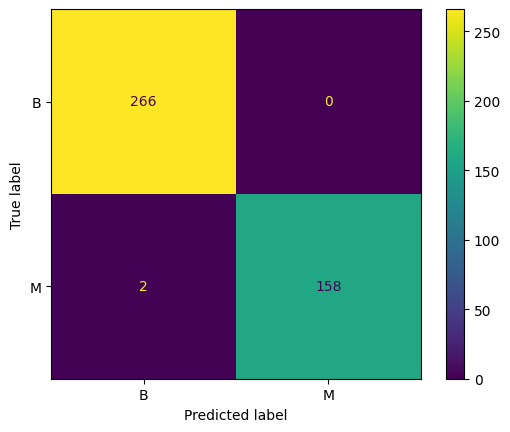

              precision    recall  f1-score   support

           B       0.99      1.00      1.00       266
           M       1.00      0.99      0.99       160

    accuracy                           1.00       426
   macro avg       1.00      0.99      0.99       426
weighted avg       1.00      1.00      1.00       426


Decision Tree - Test


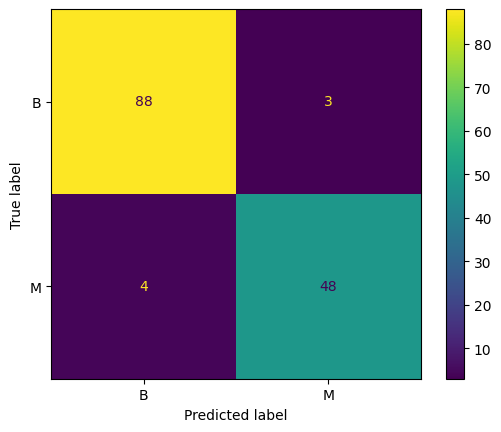

              precision    recall  f1-score   support

           B       0.96      0.97      0.96        91
           M       0.94      0.92      0.93        52

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [ ]:
# Model Evaluation

def performance_check(clf, X, y, classes):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    print(classification_report(y, y_pred, target_names=classes))

print('Decision Tree - Train')
performance_check(model_dt, X_train_encoded, y_train_encoded, classes)
print('')

print('Decision Tree - Test')
performance_check(model_dt, X_test_encoded, y_test_encoded, classes)


Pada Decision Tree, hasil evaluasi pada data train menunjukkan performa yang sangat tinggi dengan akurasi mendekati 100%, di mana kelas B memperoleh precision dan recall sempurna, sementara kelas M juga mencapai skor yang hampir sempurna; hal ini mengindikasikan bahwa model belajar dengan sangat baik dari data latih. Namun, ketika diuji pada data test, akurasinya turun menjadi sekitar 95%, dengan sedikit penurunan pada precision dan recall khususnya untuk kelas M, yang menunjukkan bahwa model tetap bekerja dengan sangat baik tetapi tidak lagi sesempurna saat di data latih. Perbedaan kecil antara hasil train dan test menggambarkan bahwa model memiliki generalisasi yang baik tanpa overfitting yang signifikan, meskipun performa di dunia nyata sedikit lebih rendah dibandingkan pada data latih.

KNN - Train


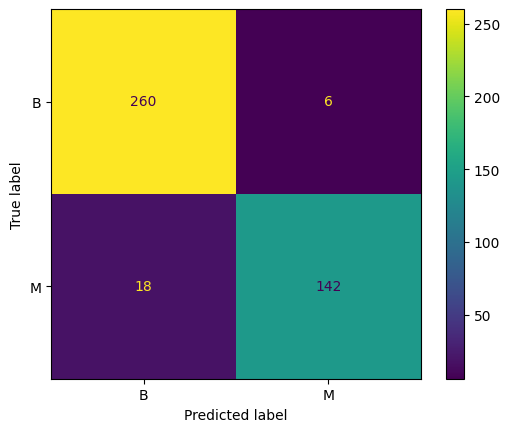

              precision    recall  f1-score   support

           B       0.94      0.98      0.96       266
           M       0.96      0.89      0.92       160

    accuracy                           0.94       426
   macro avg       0.95      0.93      0.94       426
weighted avg       0.94      0.94      0.94       426


KNN - Test


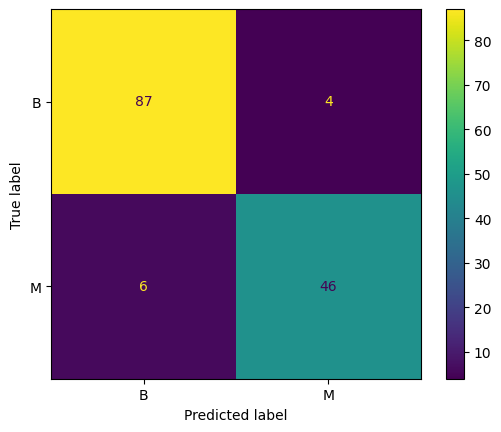

              precision    recall  f1-score   support

           B       0.94      0.96      0.95        91
           M       0.92      0.88      0.90        52

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



In [ ]:
# Model Evaluation untuk KNN

def performance_check_knn(clf, X, y, classes):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    print(classification_report(y, y_pred, target_names=classes))

print('KNN - Train')
performance_check(knn_model, X_train_encoded, y_train_encoded, classes)
print('')

print('KNN - Test')
performance_check(knn_model, X_test_encoded, y_test_encoded, classes)


Pada model KNN, hasil train dan test menunjukkan bahwa model memiliki performa yang sangat baik dan konsisten. Pada data train, model mencapai akurasi 0.94 dengan precision, recall, dan F1-score tinggi untuk kedua kelas (B dan M), menandakan bahwa model mampu belajar pola data dengan baik tanpa overfitting yang berlebihan. Saat diuji pada data test, performanya tetap stabil dengan akurasi 0.93, hanya sedikit lebih rendah dari data train yang berarti generalisasi model cukup baik. Nilai recall untuk kelas M sedikit turun pada test, tetapi masih dalam rentang yang wajar. Secara keseluruhan, model menunjukkan keseimbangan performa yang kuat antara train dan test, menandakan bahwa ia efektif dan tidak mengalami overfitting signifikan.


Decision Tree - Train


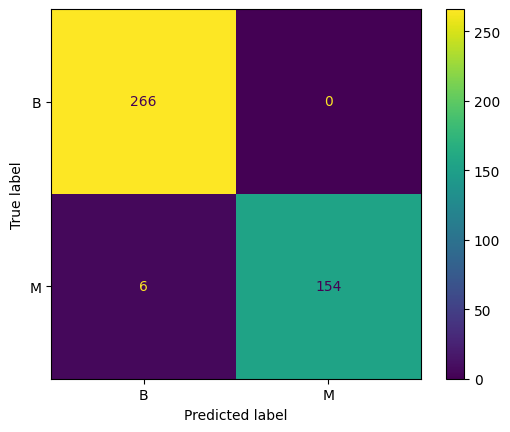

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       266
           M       1.00      0.96      0.98       160

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426


Decision Tree - Test


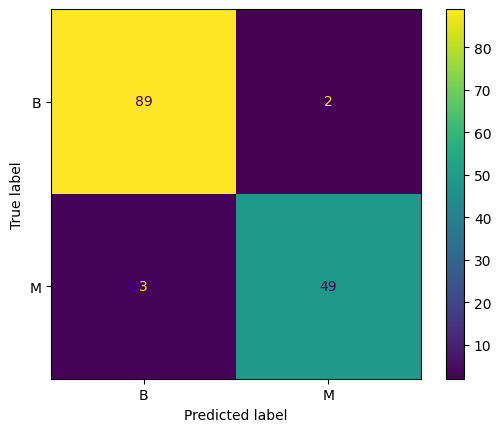

              precision    recall  f1-score   support

           B       0.97      0.98      0.97        91
           M       0.96      0.94      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [ ]:
# Model Evaluation - Decision Tree

print('Decision Tree - Train')
performance_check(model_dt_final, X_train_encoded, y_train_encoded, classes)
print('')

print('Decision Tree - Test')
performance_check(model_dt_final, X_test_encoded, y_test_encoded, classes)

Pada model Decision Tree final, hasil evaluasi model Decision Tree menunjukkan performa yang sangat baik pada data train dengan akurasi 0.99, precision dan recall yang tinggi pada kedua kelas, di mana kelas B diklasifikasikan hampir sempurna dan kelas M juga memiliki f1-score yang kuat. Ketika diuji pada data test, performa model tetap tinggi dengan akurasi 0.97, hanya terjadi sedikit penurunan pada recall kelas M, yang umum terjadi karena data uji mengandung pola baru yang tidak sepenuhnya muncul pada data latih. Secara keseluruhan, model Decision Tree memiliki kemampuan generalisasi yang baik tanpa indikasi overfitting yang berlebihan, karena selisih performa train–test sangat kecil dan konsisten di semua metrik evaluasi.

KNN - Train


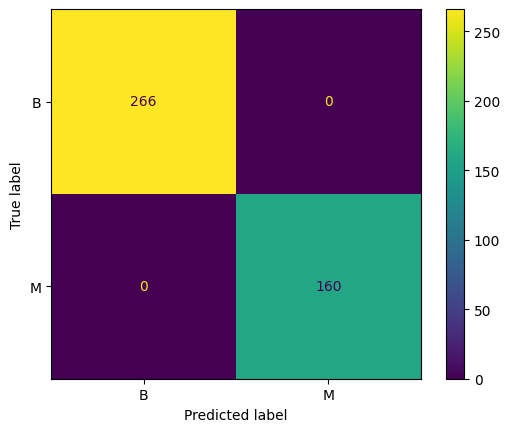

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       266
           M       1.00      1.00      1.00       160

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


KNN - Test


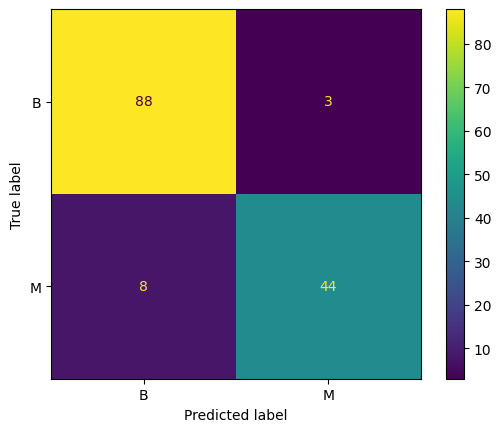

              precision    recall  f1-score   support

           B       0.92      0.97      0.94        91
           M       0.94      0.85      0.89        52

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [ ]:
# Model Evaluation - KNN

print('KNN - Train')
performance_check(model_knn_final, X_train_encoded, y_train_encoded, classes)
print('')

print('KNN - Test')
performance_check(model_knn_final, X_test_encoded, y_test_encoded, classes)

Pada model KNN final, hasil evaluasi model K-Nearest Neighbors (KNN) menunjukkan bahwa model mampu mempelajari data latih dengan sangat baik, ditandai dengan akurasi 100% pada data train serta precision, recall, dan f1-score sempurna untuk kedua kelas (B dan M). Namun, ketika diuji pada data test, performa model menurun menjadi akurasi 0.92, dengan penurunan terbesar terlihat pada recall kelas M (0.85), yang mengindikasikan bahwa model lebih sering keliru saat mendeteksi kelas M pada data baru. Perbedaan performa yang cukup jauh antara train dan test ini menunjukkan bahwa model KNN mengalami overfitting, yaitu sangat cocok dengan data latih tetapi kurang optimal dalam melakukan generalisasi ke data yang belum pernah dilihat.

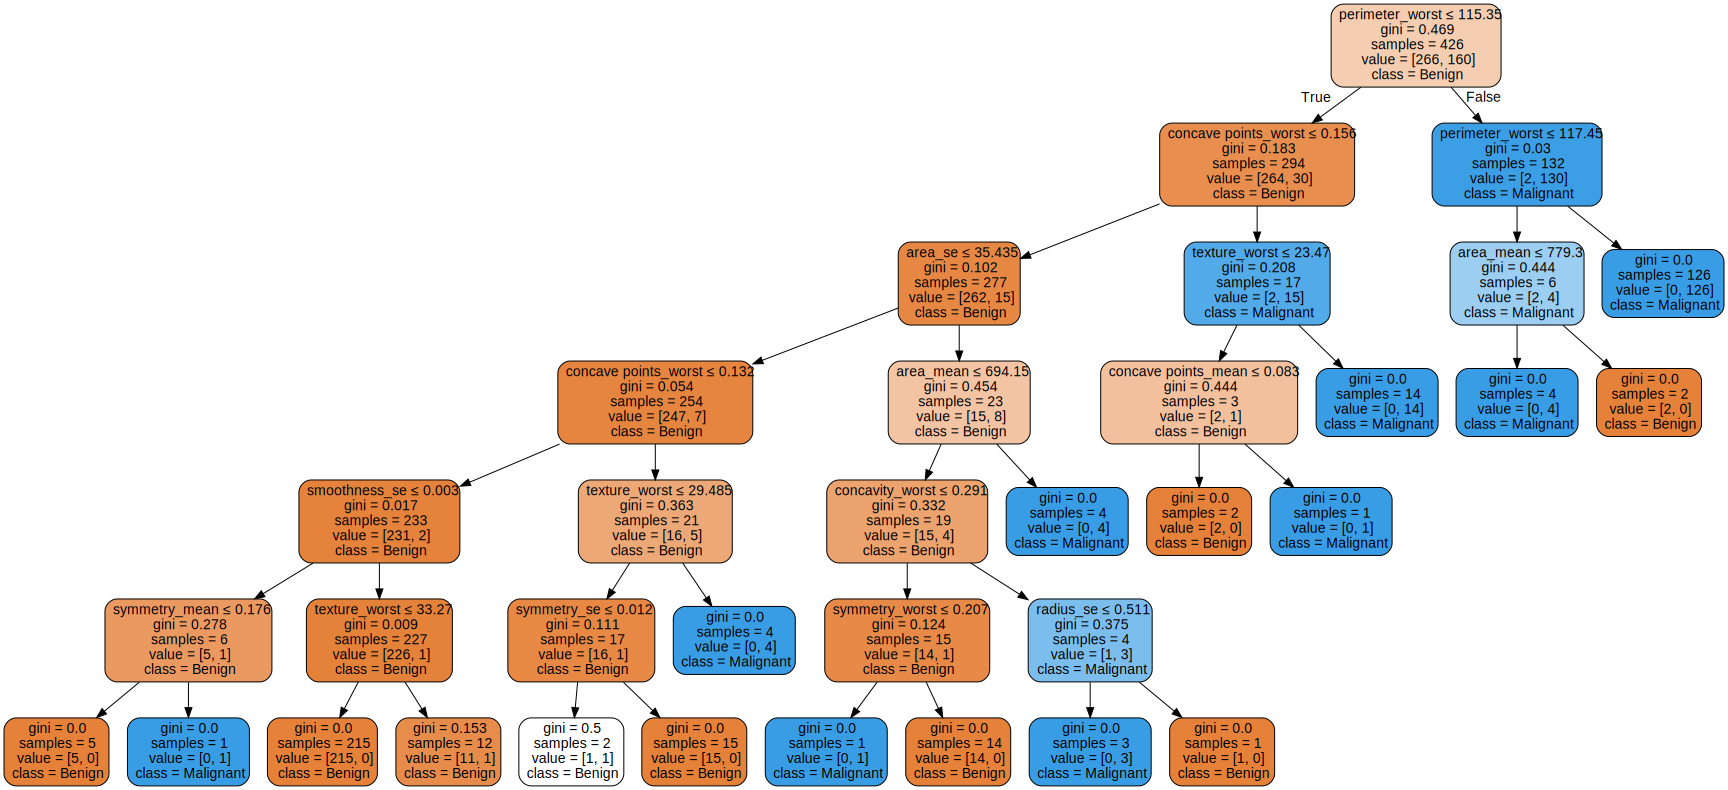

In [ ]:
# Using Scikit-Learn and Graphviz

import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(
    model_dt,
    out_file=None,
    feature_names=X.columns.tolist(),
    class_names=['Benign', 'Malignant'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph


Node berwarna oranye merepresentasikan kelompok data yang sebagian besar termasuk kategori Benign, sementara node berwarna biru menunjukkan bahwa mayoritas data pada node tersebut merupakan Malignant. Banyaknya node daun yang memiliki nilai Gini = 0 menandakan bahwa data pada node tersebut berada dalam kondisi yang sangat homogen, sehingga pemisahan kelas dapat dilakukan dengan sangat jelas. Secara keseluruhan, struktur pohon keputusan ini menunjukkan bahwa model mampu membedakan kedua kelas dengan efektif, karena sebagian besar cabang berakhir pada node dengan kemurnian tinggi yang mencerminkan keputusan klasifikasi yang kuat dan konsisten.

# Kesimpulan

Berdasarkan hasil evaluasi keseluruhan, model Decision Tree terbukti memberikan kinerja yang lebih unggul pada dataset Breast Cancer (Diagnostic) dibandingkan dengan KNN. Model Decision Tree final menunjukkan akurasi yang sangat baik pada data latih (99%) dan tetap tinggi pada data uji (97%), didukung oleh hasil cross-validation yang meningkat setelah proses tuning, dengan rata-rata akurasi 94,6% dan standar deviasi 0,028. Hal ini mengindikasikan kemampuan generalisasi yang kuat serta konsistensi performa di berbagai fold. Sebaliknya, meskipun model KNN final mencapai akurasi sempurna pada data latih (100%), akurasi pada data uji hanya mencapai 92%, menunjukkan adanya indikasi overfitting. Cross-validation KNN sebelum tuning sebenarnya sudah stabil—dengan rata-rata 92,48% dan standar deviasi 0,016—namun proses tuning tidak memberikan peningkatan berarti dan justru sedikit mengurangi kestabilannya (standar deviasi naik menjadi 0,025). Dengan demikian, Decision Tree menjadi model yang lebih tepat dan andal untuk dataset ini karena mampu menangkap pola data dengan lebih baik serta menghasilkan prediksi yang lebih konsisten pada data baru.

# Referensi

Biyantoro, A. S., & Prasetyo, B. (2022). Penerapan Decision Tree untuk Klasifikasi Status Kesehatan dengan perbandingan KNN dan Naive Bayes. Indonesian Journal of Informatic Research and Software Engineering, 4(1).

Febrian, M. F. H., Triyanto, W. A., & Fithri, D. L. (2023). Perbandingan Kinerja KNN dan Decision Tree dalam Klasifikasi Potensi Akademik Siswa SMP Wilayah Mejobo. Rabit: Jurnal Teknologi dan Sistem Informasi, 10(2).

Marutho, D. (2024). Perbandingan Metode Naïve Bayes, KNN, Decision Tree pada Laporan Water Level Jakarta. Jurnal Ilmiah Infokam.

Nasien, D., Sirvan, S., Deny, D., Syahputra, R., & Marunduri, A. A. (2022). Klasifikasi Penyakit Jantung Menggunakan Decision Tree dan KNN Menggunakan Ekstraksi Fitur PCA. JEKIN - Jurnal Teknik Informatika.

Putra, H. A., & Widiyanto, S. (2021). Komparasi Teknik Decision Tree, KNN dan Naive Bayes dalam Analisis Klasifikasi Narapidana Kasus Narkotika pada Lapas. Jurnal Ilmiah Komputasi, 20(4), 459–468.

Sotarjua, L. M., & Santoso, D. B. (2024). Perbandingan KNN, Decision Tree dan Random Forest pada Data Imbalanced Class untuk Klasifikasi Promosi Karyawan. Jurnal INSTEK (Informatika Sains dan Teknologi).

Setiawan, I., Yasin, I. F., & Desianti, Y. T. (2025). Komparasi Kinerja Algoritma Random Forest, Decision Tree, Naïve Bayes, dan KNN dalam Prediksi Tingkat Depresi Mahasiswa menggunakan Student Depression Dataset. Jurnal Ilmu Komputer dan Teknologi, 6(1), 47–58.
